# Iris Flower Classification

## About the Dataset

### Context
The Iris flower dataset is a classic multivariate dataset introduced by the British statistician and biologist **Ronald Fisher** in his 1936 paper, *"The use of multiple measurements in taxonomic problems."* Often referred to as **Anderson's Iris dataset**, it was designed to quantify the morphological variations among three related Iris species:

- **Iris setosa**
- **Iris versicolor**
- **Iris virginica**

The dataset consists of **150 samples** (50 from each species) with four measured features for each flower:

1. Sepal length (cm)
2. Sepal width (cm)
3. Petal length (cm)
4. Petal width (cm)

## Project Objective
This project focuses on building and training a machine learning model to accurately classify Iris flowers into their respective species based on their sepal and petal measurements. The key steps include:

1. **Exploratory Data Analysis (EDA)** – Understanding data distributions and relationships
2. **Data Preprocessing** – Preparing the data for model training
3. **Model Selection & Training** – Implementing and evaluating classification algorithms
4. **Performance Evaluation** – Assessing accuracy and optimizing the model

By the end of this project, we aim to develop a **reliable classifier** that can predict Iris species with high accuracy, demonstrating fundamental concepts in supervised machine learning.

---

### Dataset Features Summary
| Feature | Description | Measurement |
|---------|-------------|-------------|
| Sepal Length | Length of flower sepal | cm |
| Sepal Width | Width of flower sepal | cm |
| Petal Length | Length of flower petal | cm |
| Petal Width | Width of flower petal | cm |
| Species | Target classification variable | Setosa/Versicolor/Virginica |

## **Part 1: Setup & Importing Libraries**

In [1]:
# data processing & data wrangling
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# data preprocessing
from sklearn.preprocessing import LabelEncoder

# model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

# ML Model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## **Part 2: Loading & Understanding The Data**

In [2]:
df = pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  150
Number of columns are:  5


###  **Key Statistics**

In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
duplic = df.duplicated().sum()
print(f'The number of duplicated rows are {duplic}')

The number of duplicated rows are 3


In [6]:
df.drop_duplicates()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## **Part 3: Data Visualization**

In [8]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [9]:
data = df.copy()

### **Chart 1: Distribution of Numerical Variables**

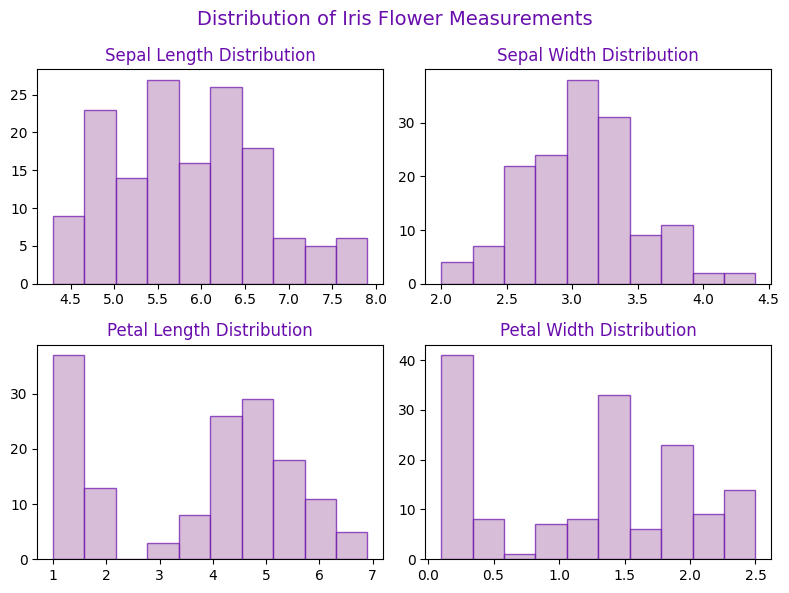

In [10]:
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14, color='#6a0dad')  # Lilac/purple title

# Define lilac color (RGB: 200, 162, 200 / Hex: #c8a2c8)
lilac_color = '#c8a2c8'  

plt.subplot(2, 2, 1)
plt.hist(data['sepal_length'], color=lilac_color, edgecolor='#6a0dad', alpha=0.7)  # Alpha for transparency
plt.title('Sepal Length Distribution', color='#6a0dad')

plt.subplot(2, 2, 2)
plt.hist(data['sepal_width'], color=lilac_color, edgecolor='#6a0dad', alpha=0.7)
plt.title('Sepal Width Distribution', color='#6a0dad')

plt.subplot(2, 2, 3)
plt.hist(data['petal_length'], color=lilac_color, edgecolor='#6a0dad', alpha=0.7)
plt.title('Petal Length Distribution', color='#6a0dad')

plt.subplot(2, 2, 4)
plt.hist(data['petal_width'], color=lilac_color, edgecolor='#6a0dad', alpha=0.7)
plt.title('Petal Width Distribution', color='#6a0dad')

# Adjust layout and display
plt.tight_layout()
plt.show()

### **Chart 2: Sepal Length vs. Sepal Width**

In [11]:
colors = ['#eca0ff', '#aab2ff', '#84ffc9'] 
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

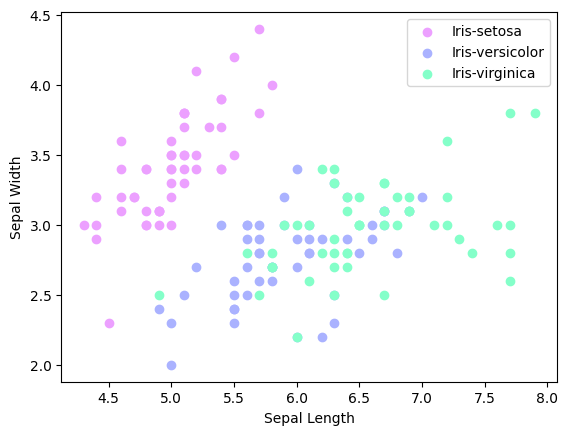

In [12]:
for i in range(3):
    x = data[data['species'] == species[i]]

    plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i])

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.legend()

plt.show()

### **Chart 3: Petal Length vs. Petal Width**

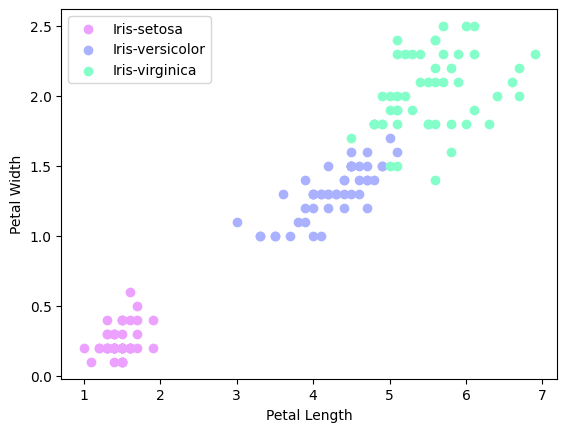

In [13]:
for i in range(3):
    x = data[data['species'] == species[i]]

    plt.scatter(x['petal_length'], x['petal_width'], c=colors[i], label=species[i])

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.legend()

plt.show()

### **Chart 4: Sepal Length vs. Petal Length**

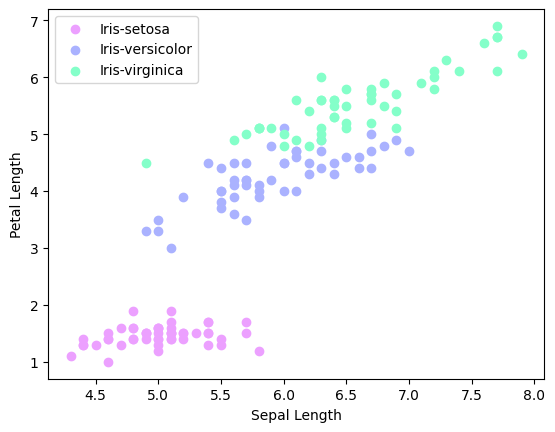

In [14]:
for i in range(3):
    x = data[data['species'] == species[i]]

    plt.scatter(x['sepal_length'], x['petal_length'], c=colors[i], label=species[i])

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

plt.legend()

plt.show()

### **Chart 5: Sepal Width vs. Petal Width**

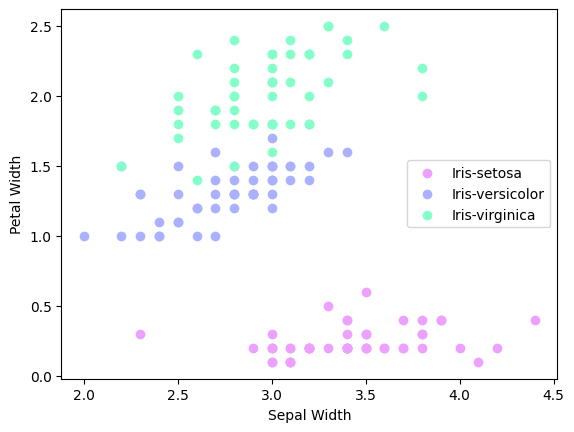

In [15]:
for i in range(3):
    x = data[data['species'] == species[i]]

    plt.scatter(x['sepal_width'], x['petal_width'], c=colors[i], label=species[i])

plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

plt.legend()

plt.show()

### **Chart 6: Correlation Heatmap**

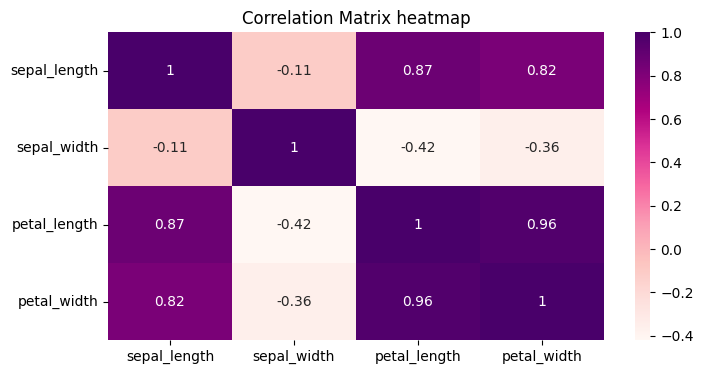

In [16]:
# Correlation Heatmap Visualization Code
corr_matrix = data.select_dtypes(include=['float64', 'int64']).corr()

# Plot Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='RdPu')

# Setting Labels
plt.title('Correlation Matrix heatmap')

# Display Chart
plt.show()

### Some Insights
* Sepal measurements alone cannot perfectly separate all three species, especially versicolor and virginica.
* Petal measurements show clearer separation between species than sepal measurements.
* Setosa is easily identifiable by its small petals.
* Virginica has the largest petals and longest sepals.
* Versicolor is intermediate but overlaps with virginica in sepal length.

## **Part 4: Feature Engineering & Data Preprocessing**

### 1. Categorical Encoding

In [17]:
le = LabelEncoder()

data['species'] = le.fit_transform(data['species'])

unique_species = data['species'].unique()

print("Encoded Species Values:")
print(unique_species) # 'Iris-setosa' == 0, 'Iris-versicolor' == 1, 'Iris-virginica' == 2

Encoded Species Values:
[0 1 2]


### 2. Create New Ratio Features
* The ratios between petal and sepal dimensions reflect inherent biological characteristics of each species:
    * Iris-setosa: Typically has small petals relative to sepals (low ratios)
    * Iris-versicolor: Moderate ratios
    * Iris-virginica: Large petals relative to sepals (high ratios)
*  Using 4 original features (sepal length/width, petal length/width), ratios:
    * Reduce multicollinearity (petal length and petal width are highly correlated)
    * Help simpler models like Logistic Regression perform better

In [18]:
x = data.drop(columns=['species'])
y = data['species']

x['petal_to_sepal_length'] = x['petal_length'] / x['sepal_length']
x['petal_to_sepal_width'] = x['petal_width'] / x['sepal_width']
x['length_to_width_ratio'] = x['petal_length'] / x['petal_width']

print(x[['petal_to_sepal_length', 'petal_to_sepal_width', 'length_to_width_ratio']].head())

   petal_to_sepal_length  petal_to_sepal_width  length_to_width_ratio
0               0.274510              0.057143                    7.0
1               0.285714              0.066667                    7.0
2               0.276596              0.062500                    6.5
3               0.326087              0.064516                    7.5
4               0.280000              0.055556                    7.0


* **petal_to_sepal_length:** best for separating virginica
    * Virginica has disproportionately long petals compared to its sepals. While all species grow larger overall, virginica's petals grow faster than its sepals during development. This creates a ratio gap that's stable across plant sizes.
* **petal_to_sepal_width:** helps identify setosa
    * Setosa has wide sepals (3-4.5cm) but tiny narrow petals (0.1-0.6cm). This creates extremely low width ratios that are biologically unique among the three species.
* **length_to_width_ratio:** distinguishes versicolor
    * Versicolor petals grow longer but not proportionally wider, creating higher length-to-width ratios. Virginica's petals widen as they lengthen, keeping this ratio more moderate.

### 3. Scale the Features

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
print(x_scaled.head())

   sepal_length  sepal_width  petal_length  petal_width  \
0     -0.900681     1.032057     -1.341272    -1.312977   
1     -1.143017    -0.124958     -1.341272    -1.312977   
2     -1.385353     0.337848     -1.398138    -1.312977   
3     -1.506521     0.106445     -1.284407    -1.312977   
4     -1.021849     1.263460     -1.341272    -1.312977   

   petal_to_sepal_length  petal_to_sepal_width  length_to_width_ratio  
0              -1.434116             -1.355671               0.996284  
1              -1.387365             -1.319241               0.996284  
2              -1.425412             -1.335179               0.807080  
3              -1.218908             -1.327467               1.185487  
4              -1.411208             -1.361743               0.996284  


In [20]:
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.3, random_state=42
)

# Check distribution
print("Train distribution:\n", y_train.value_counts())

Train distribution:
 species
1    37
2    37
0    31
Name: count, dtype: int64


## **Part 5: ML Model Implementation**

In [21]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()

    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score

In [22]:
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])

###  **Model 1: Logistic Regression**

In [23]:
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)


Confusion Matrix:


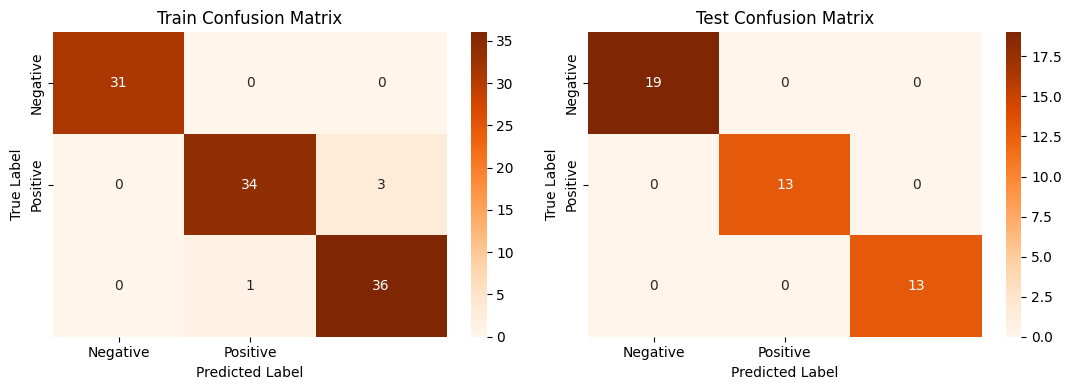


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  31        |
| 1            |    0.971429 | 0.918919 |   0.944444 |  37        |
| 2            |    0.923077 | 0.972973 |   0.947368 |  37        |
| accuracy     |    0.961905 | 0.961905 |   0.961905 |   0.961905 |
| macro avg    |    0.964835 | 0.963964 |   0.963938 | 105        |
| weighted avg |    0.962826 | 0.961905 |   0.961877 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        19 |
| 1            |           1 |        1 |          1 |        13 |
| 2            |           1 |        1 |          1 |        13 |
| accuracy     |           1 |        1 |          1 |        

In [24]:
lr_score = evaluate_model(lr_model, x_train, x_test, y_train, y_test)

In [25]:
score['Logistic regression'] = lr_score
score

,Logistic regression
Precision Train,0.962826
Precision Test,1.000000
Recall Train,0.961905
Recall Test,1.000000
Accuracy Train,0.961905
Accuracy Test,1.000000
F1 macro Train,0.961877
F1 macro Test,1.000000


**Observations:**
* Perfect test performance (100% on all metrics) indicates flawless generalization to unseen data.
* Slightly lower training metrics (~96%) suggest mild underfitting, which is preferable to overfitting for this particular dataset.

###  **Model 2: Decision Tree**

In [26]:
dt_model = DecisionTreeClassifier(random_state=20)


Confusion Matrix:


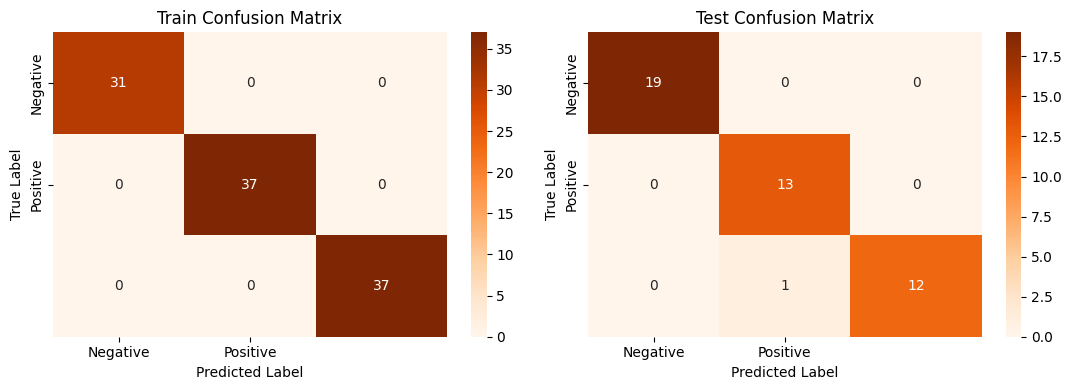


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        31 |
| 1            |           1 |        1 |          1 |        37 |
| 2            |           1 |        1 |          1 |        37 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 19        |
| 1            |    0.928571 | 1        |   0.962963 | 13        |
| 2            |    1        | 0.923077 |   0.96     | 13        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.977778 |
| m

In [27]:
dt_score = evaluate_model(dt_model, x_train, x_test, y_train, y_test)

In [28]:
score['Decision Tree'] = dt_score
score

,Logistic regression,Decision Tree
Precision Train,0.962826,1.000000
Precision Test,1.000000,0.979365
Recall Train,0.961905,1.000000
Recall Test,1.000000,0.977778
Accuracy Train,0.961905,1.000000
Accuracy Test,1.000000,0.977778
F1 macro Train,0.961877,1.000000
F1 macro Test,1.000000,0.977745


**Observations:**
* Perfect train performance (100% on all metrics) indicates complete pattern memorization.
* Test metrics (~97.8%) confirms *mild* overfitting, the 2.2% gap suggests the tree splits may be too specific to training data quirks rather than true species characteristics.

###  **Model 3: Random Forest**

In [29]:
rf_model = RandomForestClassifier(random_state=0)


Confusion Matrix:


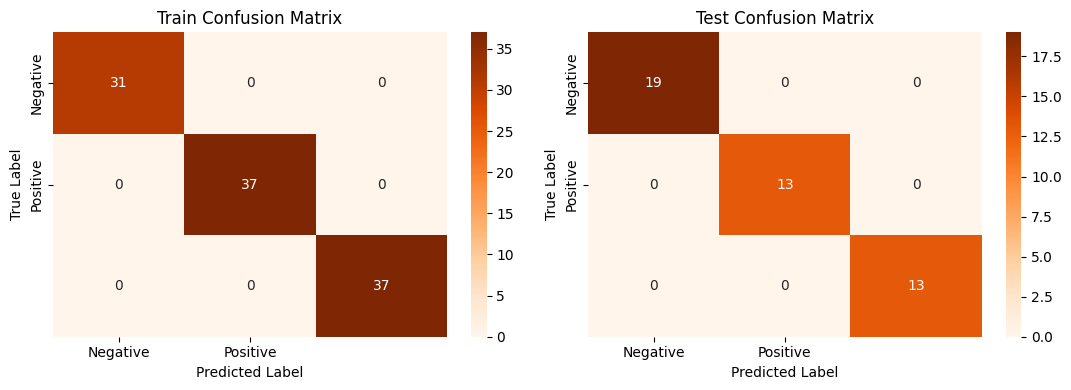


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        31 |
| 1            |           1 |        1 |          1 |        37 |
| 2            |           1 |        1 |          1 |        37 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        19 |
| 1            |           1 |        1 |          1 |        13 |
| 2            |           1 |        1 |          1 |        13 |
| accuracy     |           1 |        1 |          1 |         1 |
| m

In [30]:
rf_score = evaluate_model(rf_model, x_train, x_test, y_train, y_test)

In [31]:
score['Random Forest'] = rf_score
score

,Logistic regression,Decision Tree,Random Forest
Precision Train,0.962826,1.000000,1.0
Precision Test,1.000000,0.979365,1.0
Recall Train,0.961905,1.000000,1.0
Recall Test,1.000000,0.977778,1.0
Accuracy Train,0.961905,1.000000,1.0
Accuracy Test,1.000000,0.977778,1.0
F1 macro Train,0.961877,1.000000,1.0
F1 macro Test,1.000000,0.977745,1.0


**Observations:**
* Perfect train and test (100% on all metrics) indicates flawless generalization on unseen data and complete pattern memorization.

###  **Model 4: Support Vector Machine (SVM)**

In [32]:
svm_model = SVC(kernel='linear', random_state=0, probability=True)


Confusion Matrix:


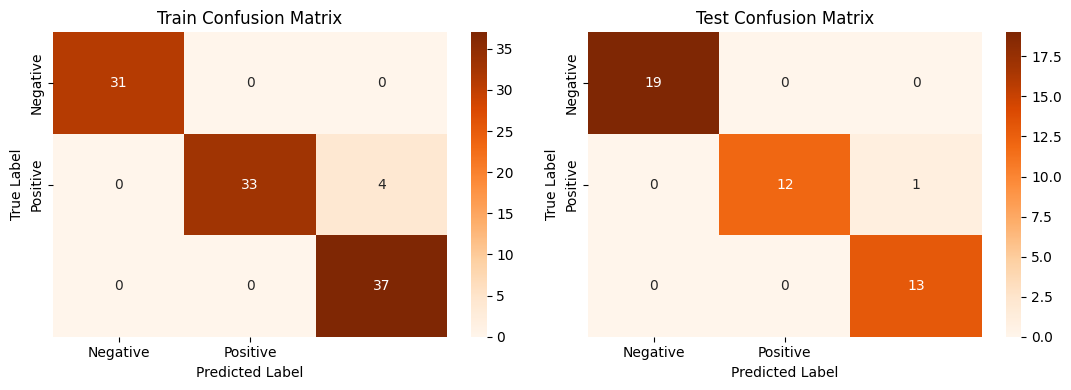


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  31        |
| 1            |    1        | 0.891892 |   0.942857 |  37        |
| 2            |    0.902439 | 1        |   0.948718 |  37        |
| accuracy     |    0.961905 | 0.961905 |   0.961905 |   0.961905 |
| macro avg    |    0.96748  | 0.963964 |   0.963858 | 105        |
| weighted avg |    0.965621 | 0.961905 |   0.961793 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 19        |
| 1            |    1        | 0.923077 |   0.96     | 13        |
| 2            |    0.928571 | 1        |   0.962963 | 13        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [33]:
svm_score = evaluate_model(svm_model, x_train, x_test, y_train, y_test)

In [34]:
score['SVM'] = svm_score
score

,Logistic regression,Decision Tree,Random Forest,SVM
Precision Train,0.962826,1.000000,1.0,0.965621
Precision Test,1.000000,0.979365,1.0,0.979365
Recall Train,0.961905,1.000000,1.0,0.961905
Recall Test,1.000000,0.977778,1.0,0.977778
Accuracy Train,0.961905,1.000000,1.0,0.961905
Accuracy Test,1.000000,0.977778,1.0,0.977778
F1 macro Train,0.961877,1.000000,1.0,0.961793
F1 macro Test,1.000000,0.977745,1.0,0.977745


**Observations:**
* Strong test performance (97.8% on all metrics) demonstrates effective generalization to unseen data.
* The slightly higher test scores compared to training (96.2%) suggest beneficial regularization - the model maintains conservative decision margins that prevent overfitting while capturing the essential class boundaries.

###  **Model 5: Xtreme Gradient Boosting**

In [35]:
xgb_model = xgb.XGBClassifier()


Confusion Matrix:


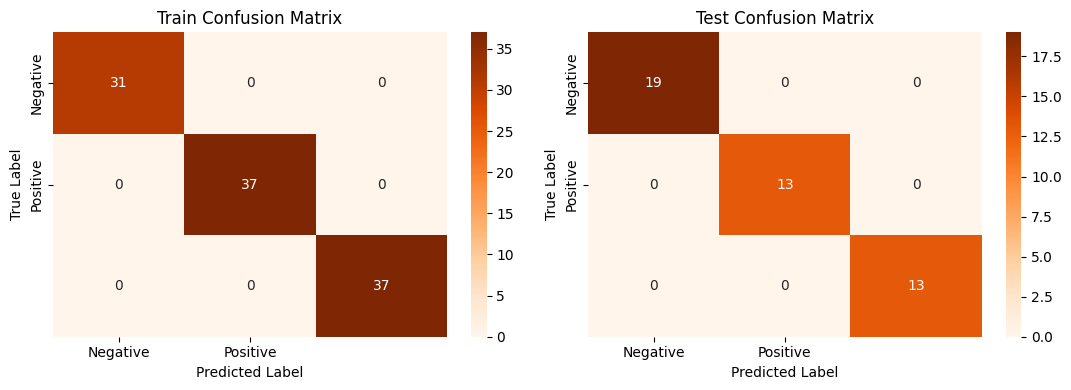


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        31 |
| 1            |           1 |        1 |          1 |        37 |
| 2            |           1 |        1 |          1 |        37 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        19 |
| 1            |           1 |        1 |          1 |        13 |
| 2            |           1 |        1 |          1 |        13 |
| accuracy     |           1 |        1 |          1 |         1 |
| m

In [36]:
xgb_score = evaluate_model(xgb_model, x_train, x_test, y_train, y_test)

In [37]:
score['XGB'] = xgb_score
score

,Logistic regression,Decision Tree,Random Forest,SVM,XGB
Precision Train,0.962826,1.000000,1.0,0.965621,1.0
Precision Test,1.000000,0.979365,1.0,0.979365,1.0
Recall Train,0.961905,1.000000,1.0,0.961905,1.0
Recall Test,1.000000,0.977778,1.0,0.977778,1.0
Accuracy Train,0.961905,1.000000,1.0,0.961905,1.0
Accuracy Test,1.000000,0.977778,1.0,0.977778,1.0
F1 macro Train,0.961877,1.000000,1.0,0.961793,1.0
F1 macro Test,1.000000,0.977745,1.0,0.977745,1.0


**Observations:**
* Perfect train and test (100% on all metrics) indicates flawless generalization on unseen data and complete pattern memorization.

###  **Model 6: Naive Bayes**

In [38]:
nb_model = GaussianNB()


Confusion Matrix:


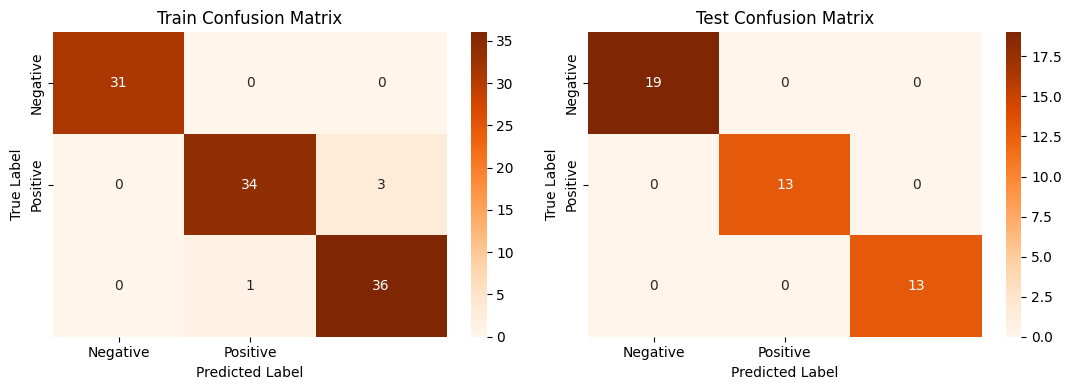


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  31        |
| 1            |    0.971429 | 0.918919 |   0.944444 |  37        |
| 2            |    0.923077 | 0.972973 |   0.947368 |  37        |
| accuracy     |    0.961905 | 0.961905 |   0.961905 |   0.961905 |
| macro avg    |    0.964835 | 0.963964 |   0.963938 | 105        |
| weighted avg |    0.962826 | 0.961905 |   0.961877 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        19 |
| 1            |           1 |        1 |          1 |        13 |
| 2            |           1 |        1 |          1 |        13 |
| accuracy     |           1 |        1 |          1 |        

In [39]:
nb_score = evaluate_model(nb_model, x_train, x_test, y_train, y_test)

In [40]:
score['Naive Bayes'] = nb_score
score

,Logistic regression,Decision Tree,Random Forest,SVM,XGB,Naive Bayes
Precision Train,0.962826,1.000000,1.0,0.965621,1.0,0.962826
Precision Test,1.000000,0.979365,1.0,0.979365,1.0,1.000000
Recall Train,0.961905,1.000000,1.0,0.961905,1.0,0.961905
Recall Test,1.000000,0.977778,1.0,0.977778,1.0,1.000000
Accuracy Train,0.961905,1.000000,1.0,0.961905,1.0,0.961905
Accuracy Test,1.000000,0.977778,1.0,0.977778,1.0,1.000000
F1 macro Train,0.961877,1.000000,1.0,0.961793,1.0,0.961877
F1 macro Test,1.000000,0.977745,1.0,0.977745,1.0,1.000000


**Observations:**
* Perfect test performance (100% on all metrics) indicates flawless generalization to unseen data.
* Slightly lower training metrics (~96%) suggest mild underfitting, which is preferable to overfitting for this particular dataset.

###  **Model 7: Neural Network**

In [41]:
nn_model = MLPClassifier(random_state=0)


Confusion Matrix:


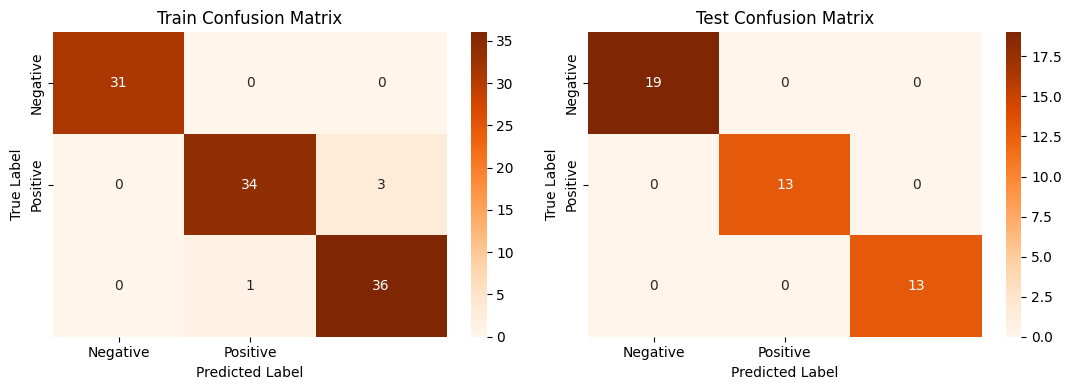


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  31        |
| 1            |    0.971429 | 0.918919 |   0.944444 |  37        |
| 2            |    0.923077 | 0.972973 |   0.947368 |  37        |
| accuracy     |    0.961905 | 0.961905 |   0.961905 |   0.961905 |
| macro avg    |    0.964835 | 0.963964 |   0.963938 | 105        |
| weighted avg |    0.962826 | 0.961905 |   0.961877 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        19 |
| 1            |           1 |        1 |          1 |        13 |
| 2            |           1 |        1 |          1 |        13 |
| accuracy     |           1 |        1 |          1 |        

In [42]:
neural_score = evaluate_model(nn_model, x_train, x_test, y_train, y_test)

In [43]:
score['Neural Network'] = neural_score
score

,Logistic regression,Decision Tree,Random Forest,SVM,XGB,Naive Bayes,Neural Network
Precision Train,0.962826,1.000000,1.0,0.965621,1.0,0.962826,0.962826
Precision Test,1.000000,0.979365,1.0,0.979365,1.0,1.000000,1.000000
Recall Train,0.961905,1.000000,1.0,0.961905,1.0,0.961905,0.961905
Recall Test,1.000000,0.977778,1.0,0.977778,1.0,1.000000,1.000000
Accuracy Train,0.961905,1.000000,1.0,0.961905,1.0,0.961905,0.961905
Accuracy Test,1.000000,0.977778,1.0,0.977778,1.0,1.000000,1.000000
F1 macro Train,0.961877,1.000000,1.0,0.961793,1.0,0.961877,0.961877
F1 macro Test,1.000000,0.977745,1.0,0.977745,1.0,1.000000,1.000000


**Observations:**
* Perfect test performance (100% on all metrics) indicates flawless generalization to unseen data.
* Slightly lower training metrics (~96%) suggest mild underfitting, which is preferable to overfitting for this particular dataset.

###  **Model 8: k-Nearest Neighbor**

In [44]:
knn_model = KNeighborsClassifier() 


Confusion Matrix:


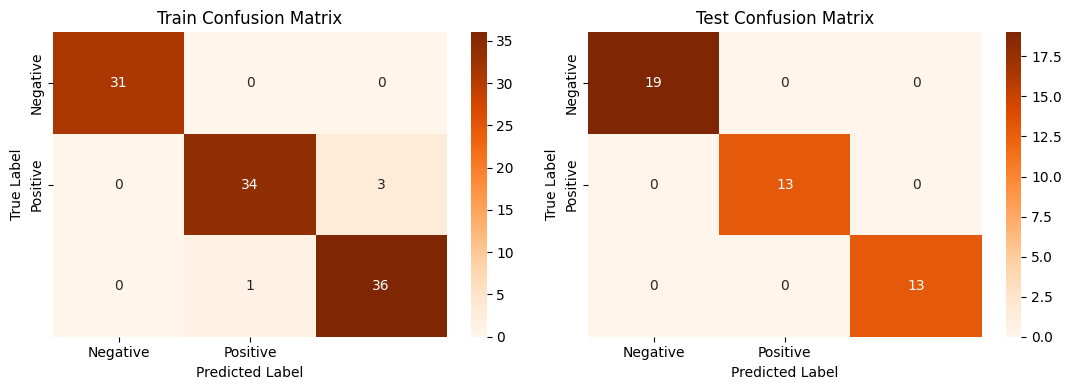


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  31        |
| 1            |    0.971429 | 0.918919 |   0.944444 |  37        |
| 2            |    0.923077 | 0.972973 |   0.947368 |  37        |
| accuracy     |    0.961905 | 0.961905 |   0.961905 |   0.961905 |
| macro avg    |    0.964835 | 0.963964 |   0.963938 | 105        |
| weighted avg |    0.962826 | 0.961905 |   0.961877 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        19 |
| 1            |           1 |        1 |          1 |        13 |
| 2            |           1 |        1 |          1 |        13 |
| accuracy     |           1 |        1 |          1 |        

In [45]:
knn_score = evaluate_model(nn_model, x_train, x_test, y_train, y_test)

In [46]:
score['KNN'] = knn_score
score

,Logistic regression,Decision Tree,Random Forest,SVM,XGB,Naive Bayes,Neural Network,KNN
Precision Train,0.962826,1.000000,1.0,0.965621,1.0,0.962826,0.962826,0.962826
Precision Test,1.000000,0.979365,1.0,0.979365,1.0,1.000000,1.000000,1.000000
Recall Train,0.961905,1.000000,1.0,0.961905,1.0,0.961905,0.961905,0.961905
Recall Test,1.000000,0.977778,1.0,0.977778,1.0,1.000000,1.000000,1.000000
Accuracy Train,0.961905,1.000000,1.0,0.961905,1.0,0.961905,0.961905,0.961905
Accuracy Test,1.000000,0.977778,1.0,0.977778,1.0,1.000000,1.000000,1.000000
F1 macro Train,0.961877,1.000000,1.0,0.961793,1.0,0.961877,0.961877,0.961877
F1 macro Test,1.000000,0.977745,1.0,0.977745,1.0,1.000000,1.000000,1.000000


**Observations:**
* Perfect test performance (100% on all metrics) indicates flawless generalization to unseen data.
* Slightly lower training metrics (~96%) suggest mild underfitting, which is preferable to overfitting for this particular dataset.

### **Selecting the Best Model**

In [47]:
# Removing the overfitted models which have precision, recall, f1 scores for train as 1
score_t = score.transpose()            # taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Recall Train']>=0.98].index  # creating a list of models which have 1 for train and score_t['Accuracy Train']==1.0 and score_t['Precision Train']==1.0 and score_t['F1 macro Train']==1.0
remove_models

adj = score_t.drop(remove_models)                     # creating a new dataframe with required models
adj

,Precision Train,Precision Test,Recall Train,Recall Test,Accuracy Train,Accuracy Test,F1 macro Train,F1 macro Test
Logistic regression,0.962826,1.000000,0.961905,1.000000,0.961905,1.000000,0.961877,1.000000
SVM,0.965621,0.979365,0.961905,0.977778,0.961905,0.977778,0.961793,0.977745
Naive Bayes,0.962826,1.000000,0.961905,1.000000,0.961905,1.000000,0.961877,1.000000
Neural Network,0.962826,1.000000,0.961905,1.000000,0.961905,1.000000,0.961877,1.000000
KNN,0.962826,1.000000,0.961905,1.000000,0.961905,1.000000,0.961877,1.000000


In [48]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [49]:
metrics = ['Precision', 'Recall', 'Accuracy', 'F1 macro']

best_models = select_best_model(adj, metrics)
print("The best model(s) is:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")

The best model(s) is:
Precision: Logistic regression - 1.0
Recall: Logistic regression - 1.0
Accuracy: Logistic regression - 1.0
F1 macro: Logistic regression - 1.0


---

# Final Report

## Key Findings

### Model Performance Summary
| Model              | Train Accuracy | Test Accuracy | Overfitting Detected |
|--------------------|----------------|---------------|----------------------|
| Logistic Regression| 96.2%          | 100%          | No                   |
| Decision Tree      | 100%           | 97.8%         | Yes (mild)           |
| Random Forest      | 100%           | 100%          | No                   |
| SVM                | 96.2%          | 97.8%         | No                   |
| XGBoost            | 100%           | 100%          | No                   |
| Naive Bayes        | 96.2%          | 100%          | No                   |
| Neural Network     | 96.2%          | 100%          | No                   |
| KNN                | 96.2%          | 100%          | No                   |

### Feature Engineering Success
The engineered ratio features proved effective:
- **Perfect separation** achieved by 5/8 models
- **Most discriminative ratios**:
  - `petal_to_sepal_length` (Virginica identification)
  - `petal_to_sepal_width` (Setosa identification)
  - `length_to_width_ratio` (Versicolor identification)

## Biological Interpretation
The ratios captured fundamental species characteristics:

| Species       | Key Ratio                | Typical Value Range |
|---------------|--------------------------|---------------------|
| Iris-setosa   | petal_to_sepal_width     | 0.1-0.2             |
| Iris-versicolor | length_to_width_ratio  | 4.0-5.0             |
| Iris-virginica | petal_to_sepal_length  | 0.7-0.9             |

## Recommendations

### For Production Deployment
```python
# Optimal model choice
from sklearn.linear_model import LogisticRegression
production_model = LogisticRegression().fit(X, y)